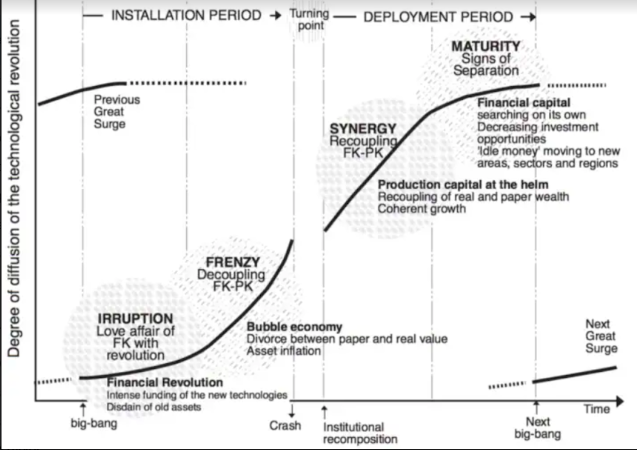

In [37]:
# https://datasetsearch.research.google.com/search?src=2&query=Facebook%20%7C%20Meta%20%7C%20FB%20-%20Stock%20Price%20%7C%20Live%20Quote%20%7C%20Historical%20Chart&docid=L2cvMTFrZHJrOGxsMw%3D%3D
# https://www.kaggle.com/datasets/vainero/google-apple-facebook-stock-price?resource=download
# https://finance.yahoo.com/quote/META/history/

import pandas as pd 

df = pd.read_csv('ds_meta.csv')
print("Shape of dataset is: ", df.shape, "\n")
print(df.head())

# Convert dataFrame column type from string to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date column
df = df.sort_values('Date').reset_index(drop=True)

# Fecha como índice
df.index = pd.DatetimeIndex(df["Date"])

# Eliminamos columnas innecesarias
# Este sliding requiere un .copy() para evitar problemas referenciales posteriores 
df = df[["Open"]].copy()
print(df.head())

# Soften data w/ a moving average on price
movingAvgWindow = 30
df['price_MA30'] = df['Open'].rolling(window=movingAvgWindow).mean()
df = df[movingAvgWindow:]

Shape of dataset is:  (2696, 7) 

         Date       Open       High        Low      Close  Adj Close  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   

      Volume  
0  573576400  
1  168192700  
2  101786600  
3   73600000  
4   50237200  
                 Open
Date                 
2012-05-18  42.049999
2012-05-21  36.529999
2012-05-22  32.610001
2012-05-23  31.370001
2012-05-24  32.950001


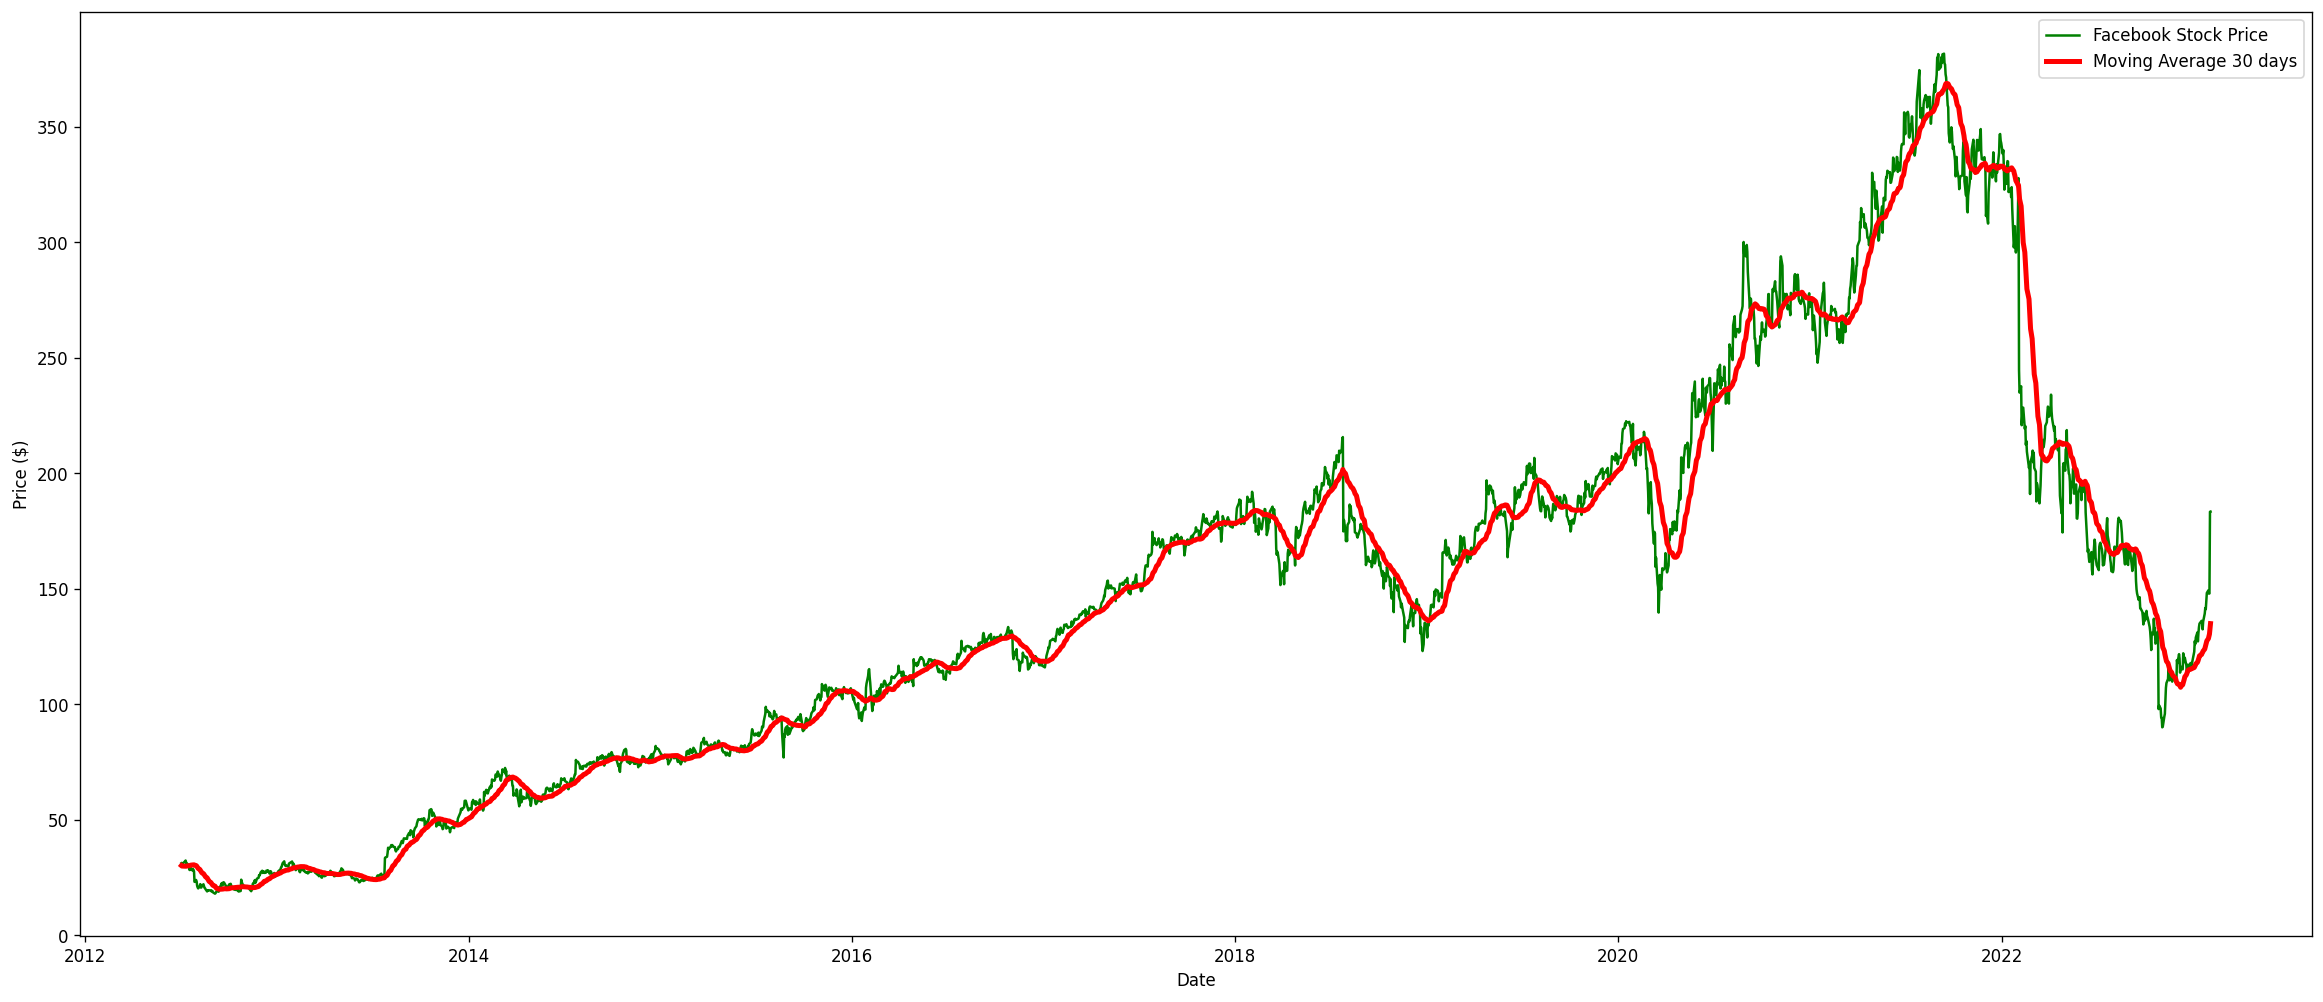

In [38]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})

# Draw it
plt.figure(figsize=(24,10))
plt.plot(df['Open'], label = 'Facebook Stock Price', color = 'green')
plt.plot(df['price_MA30'], label = 'Moving Average 30 days', color = 'red', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

### Escala Logarítmica

In [39]:
import math

df["logPrice"] = df["price_MA30"].apply(lambda x: math.log10(x))
df

,Open,price_MA30,logPrice
Date,,,
2012-07-02,31.250000,30.220667,1.480304
2012-07-03,30.910000,30.033333,1.477604
2012-07-05,31.320000,29.990333,1.476981
2012-07-06,31.440001,29.992667,1.477015
2012-07-09,32.099998,29.964333,1.476605
...,...,...,...
2023-01-30,149.410004,128.501334,2.108908
2023-01-31,147.949997,129.488667,2.112232
2023-02-01,148.029999,130.415333,2.115329


### Tendencia cuadrática parabólica inversa

regrQuad:  [-1.46395374e-17  4.70432461e-08 -3.54366284e+01]


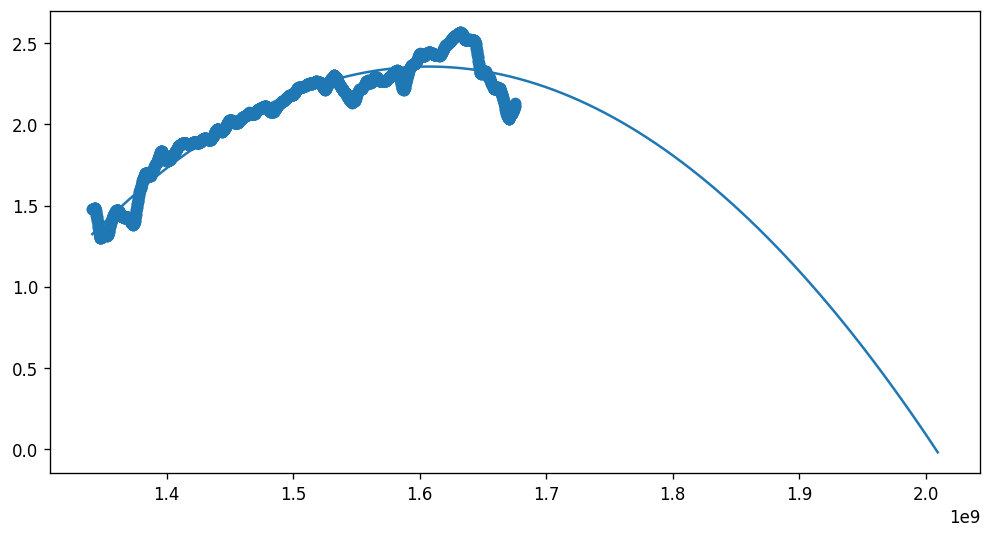

In [40]:
import numpy as np

xs = df.index.astype(np.int64) // 10 ** 9 # convierto datetimeindex a timestamp numérico
ys = df["logPrice"]

# Polynomial fit with degree = 2
regrQuad = np.polyfit(xs, ys, 2)
print("regrQuad: ", regrQuad)
model = np.poly1d(regrQuad)

# Add fitted polynomial line to scatterplot
polyline = np.linspace(xs.min(), xs.max() + (xs.max() - xs.min()), 100)
plt.scatter(xs, ys)
plt.plot(polyline, model(polyline))
plt.show()